In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams


In [3]:
#read Dataframe
df = pd.read_csv("household_power_consumption.txt", sep=";")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# to date-time
df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# remove date and time
df.drop(columns=['Date', 'Time'], inplace=True)

# Make Date_time index
df.set_index('Date_time', inplace=True)


In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
df.shape

(2075259, 7)

In [9]:
df[df.Global_reactive_power=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,?,?,?,?,?,?,NaN
2010-09-28 19:10:00,?,?,?,?,?,?,NaN
2010-09-28 19:11:00,?,?,?,?,?,?,NaN


In [10]:
df = df.replace('?', np.nan)

In [11]:
df = df.astype('float')

In [29]:
#visualizing Data

def visualization(df, column,ma=None):
    plt.figure(figsize=(10,6))
    plt.plot(df.index, df[column].values, '--', marker='*')
    plt.grid()
    if ma is not None:
        plt.plot(ma.index, ma)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.show()



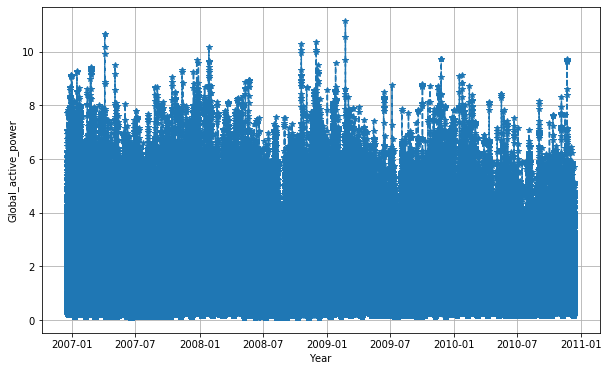

In [27]:
visualization(df,"Global_active_power")

In [14]:
df.isnull().sum().values.any()

True

In [30]:
#filling missing values
def fillMissingData(metrics, direction):
    missing =df.isnull().sum().values
    if metrics == "fillna":
        df_fill=df.fillna(method=direction)
        print("No of missing value:{}\n{}".format(missing, df_fill.isnull().sum()))
        return df_fill
    else:
        df_fill=df.interpolate(method="linear", limit_direction=str(direction))
        print("No of missing value:{}\n{}".format(missing, df_fill.isnull().sum()))
        return df_fill



In [31]:
fillMissingData("fillna", 'ffill')

No of missing value:[25979 25979 25979 25979 25979 25979 25979]
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [32]:
#Undersampling sampling Data
def sampling(period):
    df_rate = df.resample(period).mean()
    visualization(df_rate,"Global_active_power")
    return df_rate



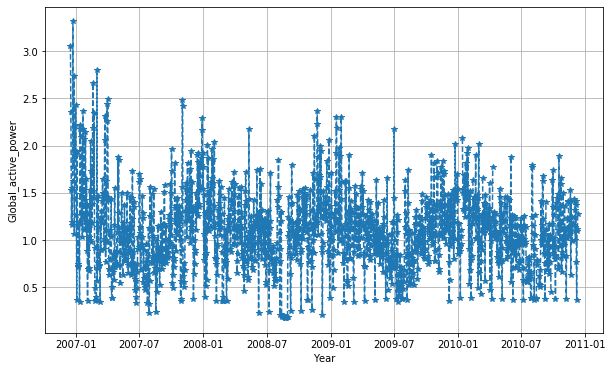

In [88]:
sample_rate=sampling("D")

In [38]:
sample_rate.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16,1.633093,0.117969,241.086581,6.903830,0.979743,2.277729,8.202015
2006-12-23,2.061153,0.135012,242.107983,8.691865,1.541369,1.973909,6.931746
2006-12-30,1.570216,0.124330,239.568803,6.638658,1.277634,1.556658,6.751538
2007-01-06,1.012675,0.126139,238.607794,4.321833,1.582024,0.900378,5.736429
2007-01-13,1.605249,0.141548,240.478867,6.808572,1.820419,1.634686,8.214009


In [41]:
#moving Average of undrsample
def MovingAverage(column, Num):
    MA = sample_rate[column].rolling(int(Num)).mean()
    visualization(sample_rate, column, MA)
    



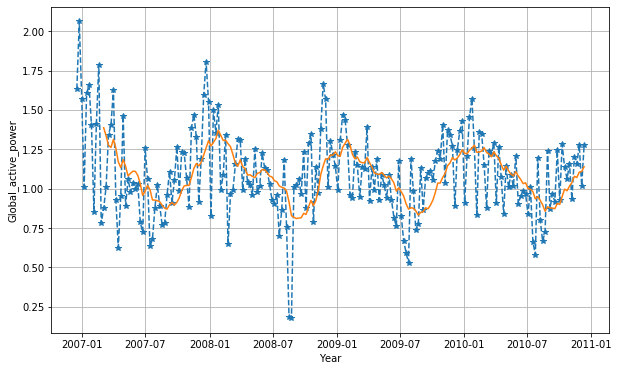

In [42]:
MovingAverage("Global_active_power", 12)

In [44]:
#decompose Data to Trend,Seasons,Residual
def decompose(df, column, metrics):
    rcParams['figure.figsize'] = 15 , 8
    decompose_series = sm.tsa.seasonal_decompose(df[column], model=metrics )
    decompose_series.plot()
    plt.show()

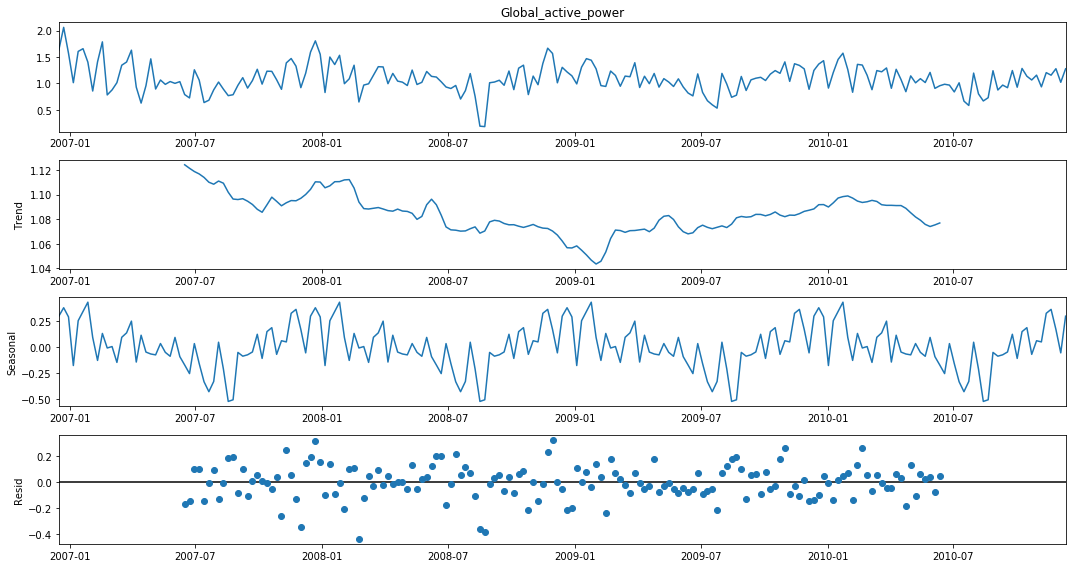

In [45]:
decompose(sample_rate, "Global_active_power", "additive")

In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
#P-value and critica value using Adfuller
def adfullerModel(df, column):
    data = df.copy()

    adf_result = adfuller(data[column])

    print('ADF Statistic: {}'.format(adf_result[0]))
    print('p-value: {}'.format(adf_result[1]))
    print('No. of lags used: {}'.format(adf_result[2]))
    print('No. of observations used : {}'.format(adf_result[3]))
    print('\nCritical Values:\n')

    for k, v in adf_result[ 4 ].items():
          print('{} : {}'.format(k,v))

In [65]:
adfullerModel(sample_rate, "Global_active_power")

ADF Statistic: -4.608894213242638
p-value: 0.0001243806365776688
No. of lags used: 15
No. of observations used : 193

Critical Values:

1% : -3.4646940755442612
5% : -2.8766348847254934
10% : -2.5748163958763994


In [66]:
# convert to stationary series
def diff_data(df, column, rolling):
    df_log = np.log(df)
    df_diff = df_log.diff(periods= 1 )
    plt.plot(df_diff.index, df_diff[column], '-')
    plt.plot(df_diff[column].rolling(rolling).mean(), color= 'red')
    plt.show()
    
    return df_diff

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


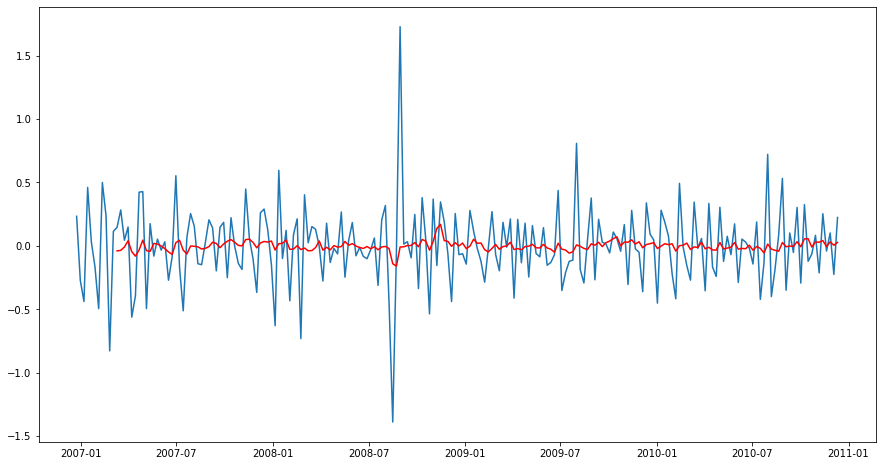

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-23,0.232789,0.134944,0.004228,0.230311,0.453136,-0.143163,-0.168268
2006-12-30,-0.272052,-0.082426,-0.010543,-0.269478,-0.187661,-0.237474,-0.026341
2007-01-06,-0.438618,0.014443,-0.004019,-0.429230,0.213695,-0.547482,-0.162933
2007-01-13,0.460683,0.115254,0.007811,0.454503,0.140361,0.596392,0.359004
...,...,...,...,...,...,...,...
2010-11-13,0.253352,-0.364136,-0.000339,0.234246,-0.041540,-0.493710,0.227684
2010-11-20,-0.040952,-0.155620,0.001537,-0.040245,0.301756,0.299766,-0.112438
2010-11-27,0.101480,0.161973,0.011991,0.078785,-0.450253,0.132843,0.509980


In [67]:
diff_data(sample_rate, "Global_active_power", 12)

In [70]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [71]:
#Test for stasionar or non stationary
def stochastic_model(df, column):
    plt.figure(figsize=(10 , 6))
    #ACF
    plot_acf(df[column].iloc[1:])
    #PACF
    plot_pacf(df[column].iloc[1:])
    plt.show()

<Figure size 720x432 with 0 Axes>

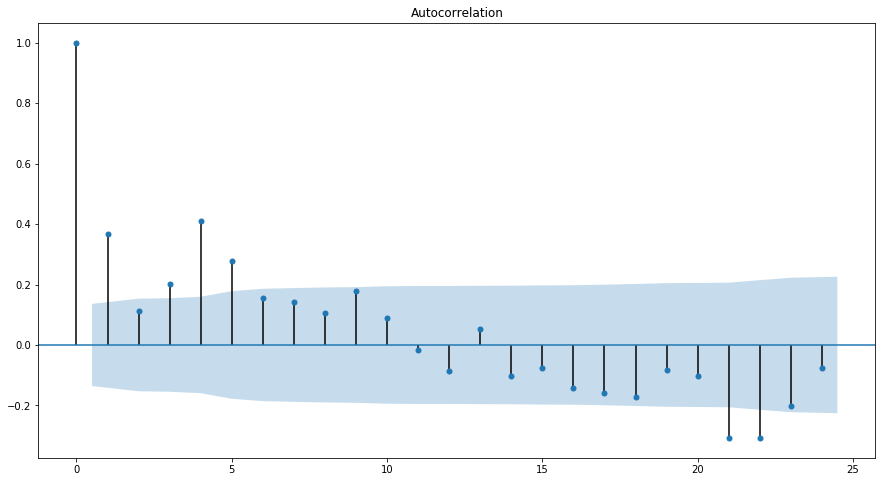

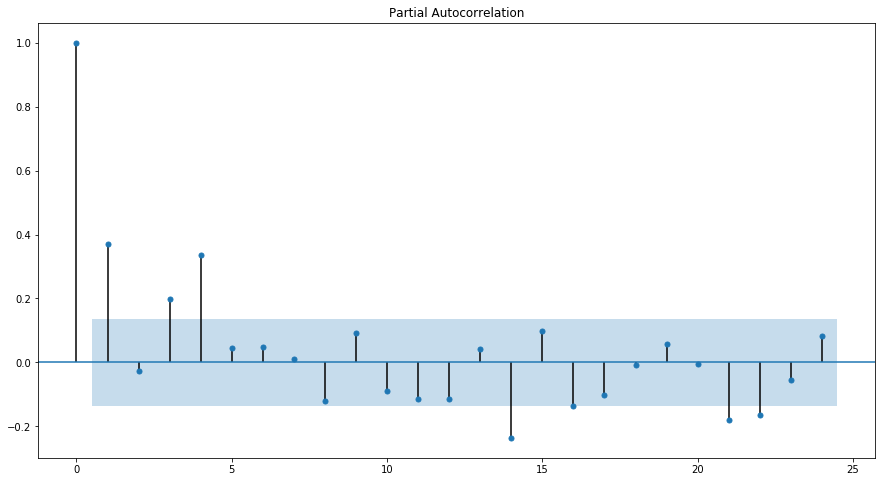

In [72]:
stochastic_model(sample_rate, "Global_active_power")

In [76]:
from statsmodels.tsa.arima_model import ARIMA

In [77]:
#for predicting
def arima_model(df, column, p, q, r):
    AR_model = ARIMA(df[column].iloc[1:], order=(p, q, r))
    AR_model_results = AR_model.fit()
    plt.plot(df[column])
    plt.plot(AR_model_results.fittedvalues, color='red')

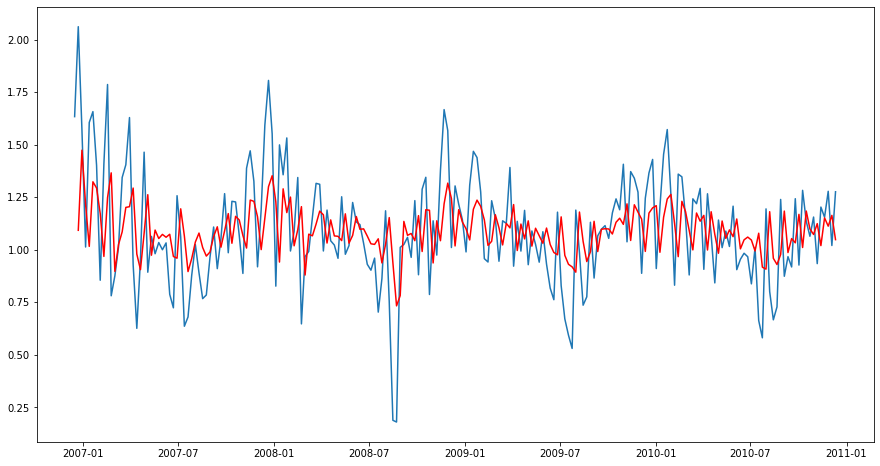

In [78]:
arima_model(sample_rate, "Global_active_power", 0, 0, 2)

In [82]:
sample_rate.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16,1.633093,0.117969,241.086581,6.903830,0.979743,2.277729,8.202015
2006-12-23,2.061153,0.135012,242.107983,8.691865,1.541369,1.973909,6.931746
2006-12-30,1.570216,0.124330,239.568803,6.638658,1.277634,1.556658,6.751538
2007-01-06,1.012675,0.126139,238.607794,4.321833,1.582024,0.900378,5.736429
2007-01-13,1.605249,0.141548,240.478867,6.808572,1.820419,1.634686,8.214009


In [85]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [86]:
#for Modeling
def prophesy(df, column):
    data = df[[column]]
    data = data.reset_index()
    data["Date_time"]= pd.to_datetime(data["Date_time"])
    data = data.rename(columns={"Date_time": "ds", column: "y"})
    print(data.head())   

    model = Prophet()
    model.fit(data)

    #predict for the next 10 months
    future = model.make_future_dataframe(periods=10, freq='M') 
    forecast = model.predict(future) 
    forecast.head()
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
    #yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


    model.plot(forecast)
    plt.show()

          ds         y
0 2006-12-16  1.633093
1 2006-12-23  2.061153
2 2006-12-30  1.570216
3 2007-01-06  1.012675
4 2007-01-13  1.605249


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


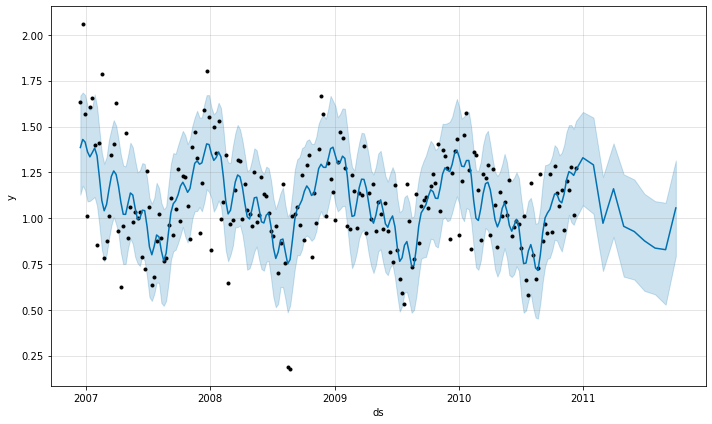

In [87]:
prophesy(sample_rate, "Global_active_power")